In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    'Dataset/train',  # Path to training data directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'Dataset/test',  
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

Found 2609 images belonging to 19 classes.
Found 897 images belonging to 20 classes.


In [4]:
path = './Dataset/train/' #Don't forget that last bar

In [5]:
import os
class_names = sorted(os.listdir(path))
num_classes = len(class_names)
print (num_classes)
img_size = (192, 192, 3)

print('classes: ', class_names)

19
classes:  ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


In [6]:
import cv2

labels = []
images = []

print('images:\n')
for cl in class_names:
    print(cl, end=' -> ')
    for img in os.listdir(path + cl):
        label = np.zeros(num_classes)
        label[class_names.index(cl)] = 1
        labels.append(label)
        
        image = np.asarray(cv2.resize(cv2.imread(path + cl + '/' + img, cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1])#That line remove Blue
        
        #image = np.asarray(cv2.resize(cv2.imread(data_path + cl + '/' + img, cv2.COLOR_BGR2RGB), img_size[0:2]))
        images.append(image)
    print('done')

    
labels = np.asarray(labels)
images = np.asarray(images)

print(f'\n\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')


images:

Acne and Rosacea Photos -> 

done
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions -> done
Atopic Dermatitis Photos -> done
Cellulitis Impetigo and other Bacterial Infections -> done
Eczema Photos -> done
Exanthems and Drug Eruptions -> done
Herpes HPV and other STDs Photos -> done
Light Diseases and Disorders of Pigmentation -> done
Lupus and other Connective Tissue diseases -> done
Melanoma Skin Cancer Nevi and Moles -> done
Poison Ivy Photos and other Contact Dermatitis -> done
Psoriasis pictures Lichen Planus and related diseases -> done
Seborrheic Keratoses and other Benign Tumors -> done
Systemic Disease -> done
Tinea Ringworm Candidiasis and other Fungal Infections -> done
Urticaria Hives -> done
Vascular Tumors -> done
Vasculitis Photos -> done
Warts Molluscum and other Viral Infections -> done


labels shape: (2609, 19)
images shape: (2609, 192, 192, 3)


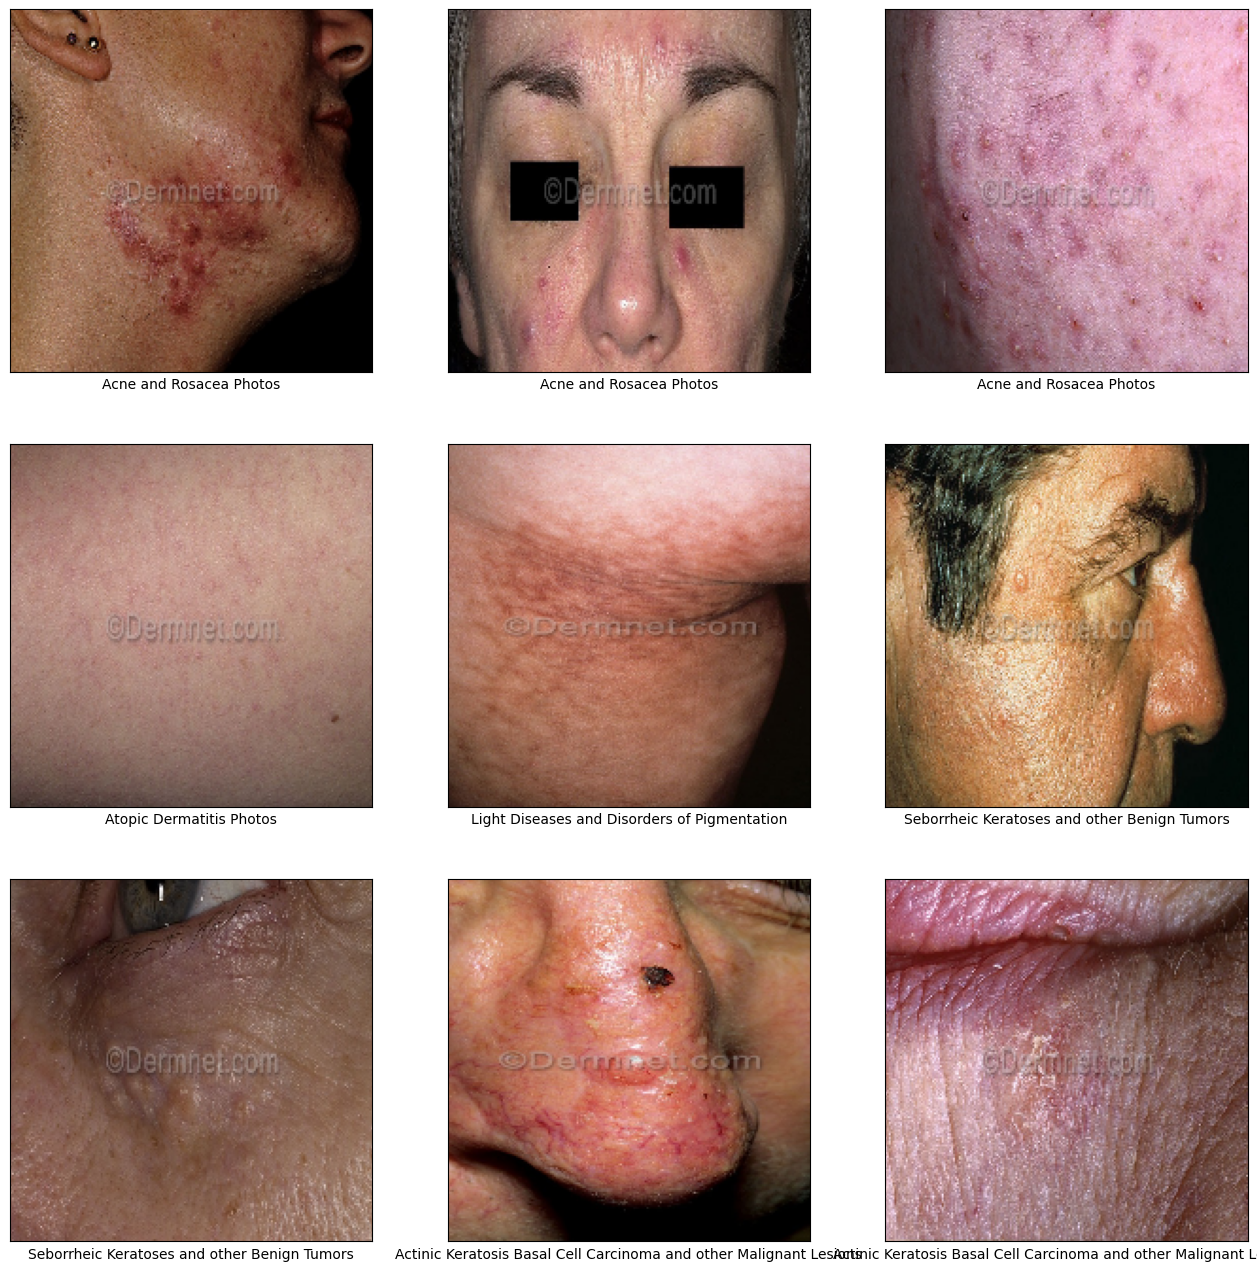

In [25]:
from random import randint

fig, axs = plt.subplots(3, 3, figsize=(16, 16))#Original was 10,6

for x in range(3):
    for y in range(3):
        i = randint(0, len(images))
        
        axs[x][y].imshow(images[i])
        
                    
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])
        
        
plt.show()

In [7]:
#r diviser vos données en ensembles d’entraînement et de validation.
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.15, random_state=42)

print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_val.shape}\nvalidation labels shape: {y_val.shape}\n')

train images shape: (2217, 192, 192, 3)
train labels shape: (2217, 19)

validation images shape: (392, 192, 192, 3)
validation labels shape: (392, 19)



In [27]:
import tensorflow as tf

cnn_model = tf.keras.Sequential()

# Inputs and rescaling
cnn_model.add(tf.keras.layers.Rescaling(scale=1. / 255, input_shape=(img_size)))

# Convolutional block 1
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 2
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 3
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 4
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
cnn_model.add(tf.keras.layers.Flatten())

# Dense block
cnn_model.add(tf.keras.layers.Dense(256, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


cnn_model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 192, 192, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 192, 192, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 192, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 96, 96, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 128)       32896     
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 128)       65664     
                                                       

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

# creating ModelChecpoint callback
checkpoint_callback = ModelCheckpoint('cnn_model/model{epoch:02d}')

In [29]:
history = cnn_model.fit(images, labels, epochs=100, validation_data=(X_val, y_val) )

Epoch 1/100
82/82 [==============================] - 492s 6s/step - loss: 2.3144 - accuracy: 0.3239 - val_loss: 2.2649 - val_accuracy: 0.3469
Epoch 2/100
82/82 [==============================] - 497s 6s/step - loss: 2.2473 - accuracy: 0.3266 - val_loss: 2.2521 - val_accuracy: 0.3240
Epoch 3/100
82/82 [==============================] - 433s 5s/step - loss: 2.2055 - accuracy: 0.3450 - val_loss: 2.2253 - val_accuracy: 0.3469
Epoch 4/100
82/82 [==============================] - 419s 5s/step - loss: 2.1616 - accuracy: 0.3542 - val_loss: 2.1183 - val_accuracy: 0.3852
Epoch 5/100
82/82 [==============================] - 474s 6s/step - loss: 2.0931 - accuracy: 0.3722 - val_loss: 2.0180 - val_accuracy: 0.3852
Epoch 6/100
82/82 [==============================] - 510s 6s/step - loss: 1.9980 - accuracy: 0.4028 - val_loss: 1.8570 - val_accuracy: 0.4515
Epoch 7/100
82/82 [==============================] - 472s 6s/step - loss: 1.8194 - accuracy: 0.4404 - val_loss: 1.5764 - val_accuracy: 0.4872
Epoch 

In [10]:
#architecture
model_json = cnn_model.to_json()
with open("cnn_model.json", "w") as json_file:
    json_file.write(model_json)

NameError: name 'cnn_model' is not defined

In [14]:
#poids
cnn_model.save_weights('cnn_model.h5')

In [15]:
from keras.models import model_from_json
json_file = open('model/cnn_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
cnn_model = model_from_json(loaded_model_json)

In [16]:
import cv2

# Chemin vers l'image
image_path = 'images/1.jpg'

# Lire l'image
loaded_image = cv2.imread(image_path)


In [17]:
import numpy as np
import cv2

# Convertir l'image téléchargée en tableau numpy
uploaded_image_np = np.array(loaded_image)

# Redimensionner l'image à la taille attendue par le modèle
processed_image = cv2.resize(uploaded_image_np, (192, 192))

# Mettre à l'échelle les valeurs de pixels à l'intervalle [0, 1]
processed_image = processed_image / 255.0


In [18]:


# Effectuer la prédiction avec le modèle
prediction = cnn_model.predict(np.expand_dims(processed_image, axis=0))

# Obtenir la classe prédite
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]

print(f"Classe prédite : {predicted_class}")


1/1 [==============================] - 2s 2s/step
Classe prédite : Vasculitis Photos


In [60]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Charger le modèle CNN préalablement entraîné
# Assurez-vous de spécifier le bon chemin vers votre modèle enregistré

# Fonction pour prétraiter une image pour la prédiction
def preprocess_image(img):
    img = cv2.resize(img, (128, 128))  # Redimensionner l'image à la taille attendue par le modèle
    img = img / 255.0  # Mettre à l'échelle les valeurs de pixels à l'intervalle [0, 1]
    return img

# Charger votre modèle CNN ici (remplacez 'votre_modele.h5' par le chemin vers votre modèle)
cnn_model.load_weights("model/cnn_model.h5")
print("Loaded model from disk")

cap = cv2.VideoCapture(0)
# Capturer des images de la webcam en continu
#cap = cv2.VideoCapture(0)  # 0 pour la webcam par défaut, ou spécifiez un autre numéro pour une webcam spécifique


# Définir le seuil de confiance
confidence_threshold = 0.5

while True:
    ret, frame = cap.read()  # Lire un cadre de la webcam
    
    if not ret:
        print("Erreur lors de la capture de l'image de la webcam.")
        break
    
    # Prétraiter l'image capturée pour la prédiction
    processed_frame = preprocess_image(frame)
    # Redimensionner l'image prétraitée à la taille attendue par le modèle
    processed_frame = cv2.resize(processed_frame, (192, 192))

    # Effectuer la prédiction avec le modèle CNN
    prediction = cnn_model.predict(np.expand_dims(processed_frame, axis=0))

    # Obtenir la classe prédite
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]

    # Vérifier si la prédiction dépasse le seuil de confiance
    if np.max(prediction) > confidence_threshold:
        # Si une anomalie est détectée avec une probabilité suffisante
        # Dessiner un cadre autour de la zone affectée
        # Utiliser des techniques de segmentation pour détecter les zones anormales dans l'image
        # Dans cet exemple, nous utilisons une méthode de seuillage simple pour la démonstration
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Trouver le rectangle englobant la zone affectée
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 100:  # Ajustez cette valeur selon la taille des anomalies que vous recherchez
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(frame, f"Anomalie detectee: {predicted_class}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2, cv2.LINE_AA)
    else:
        # Si la prédiction est inférieure au seuil de confiance, ne pas afficher d'anomalie détectée
        cv2.putText(frame, "Detection en cours...", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Afficher le cadre de la webcam
    cv2.imshow('Webcam', frame)

    # Sortir de la boucle si la touche 'q' est enfoncée
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libérer la capture de la webcam et fermer les fenêtres OpenCV
cap.release()
cv2.destroyAllWindows()


Loaded model from disk
1/1 [==============================] - 0s 105ms/step


In [52]:
cap.release()
cv2.destroyAllWindows()

NameError: name 'load_weights' is not defined